In [ ]:
!pip install yfinance

import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline


     |████████████████████████████████| 6.4 MB 13.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
df = yf.download("VDE VAW VIS VCR VDC VHT VFH VGT VOX VPU VNQ", period="1y", interval = "1d")['Adj Close']

[*********************100%***********************]  11 of 11 completed


In [ ]:
# Estimated yearly returns for individual ETF
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

VAW    0.224329
VCR    0.211401
VDC    0.136478
VDE    0.540326
VFH    0.335725
VGT    0.267205
VHT    0.153313
VIS    0.172794
VNQ    0.324603
VOX    0.110723
VPU    0.132204
dtype: float64

In [ ]:
# Variance for individual ETF
df.resample('Y').last().pct_change().var()

VAW   NaN
VCR   NaN
VDC   NaN
VDE   NaN
VFH   NaN
VGT   NaN
VHT   NaN
VIS   NaN
VNQ   NaN
VOX   NaN
VPU   NaN
dtype: float64

In [ ]:
# Correlation Coefficient Matrix
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,VAW,VCR,VDC,VDE,VFH,VGT,VHT,VIS,VNQ,VOX,VPU
VAW,1.000000,0.608827,0.521796,0.641216,0.815566,0.435004,0.496558,0.879864,0.469922,0.485984,0.315341
VCR,0.608827,1.000000,0.412910,0.361936,0.544162,0.775262,0.529612,0.695304,0.530809,0.712810,0.275793
VDC,0.521796,0.412910,1.000000,0.270901,0.482421,0.384374,0.521672,0.585583,0.600021,0.482088,0.662094
VDE,0.641216,0.361936,0.270901,1.000000,0.694939,0.195272,0.180986,0.627426,0.266279,0.328518,0.036982
VFH,0.815566,0.544162,0.482421,0.694939,1.000000,0.346818,0.395301,0.872074,0.468744,0.472587,0.319878
VGT,0.435004,0.775262,0.384374,0.195272,0.346818,1.000000,0.643834,0.525222,0.508993,0.751354,0.239726
VHT,0.496558,0.529612,0.521672,0.180986,0.395301,0.643834,1.000000,0.531597,0.493613,0.561962,0.467470
VIS,0.879864,0.695304,0.585583,0.627426,0.872074,0.525222,0.531597,1.000000,0.594376,0.585445,0.401185
VNQ,0.469922,0.530809,0.600021,0.266279,0.468744,0.508993,0.493613,0.594376,1.000000,0.536905,0.609146
VOX,0.485984,0.712810,0.482088,0.328518,0.472587,0.751354,0.561962,0.585445,0.536905,1.000000,0.340505


In [ ]:
# VIS, VFH and VOX are now removed due to their high correlation coefficients
df = yf.download("VDE VAW VCR VDC VHT VGT VPU VNQ", period="1y", interval = "1d")['Adj Close']

[*********************100%***********************]  8 of 8 completed


In [ ]:
df

,VAW,VCR,VDC,VDE,VGT,VHT,VNQ,VPU
Date,,,,,,,,
2020-12-15,152.317459,267.049438,168.897751,52.805584,342.449890,218.836884,82.785629,133.963882
2020-12-16,151.884796,268.450226,169.102341,52.575535,344.941193,218.057297,82.882187,132.405273
2020-12-17,153.727432,271.837891,170.362839,52.326454,348.083862,220.724442,83.683586,133.324203
2020-12-18,153.954803,270.764954,170.353012,51.425110,347.149017,221.071228,82.003540,131.857819
2020-12-21,153.233154,269.841034,168.838837,50.514076,348.073944,219.505798,81.540085,130.362106
...,...,...,...,...,...,...,...,...
2021-12-08,192.000000,346.329987,189.070007,80.379997,458.649994,255.169998,112.040001,150.750000
2021-12-09,190.750000,340.140015,189.139999,79.550003,452.700012,254.270004,110.419998,150.419998
2021-12-10,191.919998,341.309998,192.220001,80.220001,460.040009,254.619995,110.760002,151.059998


In [ ]:
# Covariance Matrix
cov_matrix = df.pct_change().cov()
cov_matrix

,VAW,VCR,VDC,VDE,VGT,VHT,VNQ,VPU
VAW,0.000127,0.000074,0.000040,0.000139,0.000059,0.000042,0.000049,0.000033
VCR,0.000074,0.000116,0.000030,0.000075,0.000101,0.000043,0.000053,0.000027
VDC,0.000040,0.000030,0.000047,0.000036,0.000032,0.000027,0.000038,0.000042
VDE,0.000139,0.000075,0.000036,0.000374,0.000045,0.000026,0.000048,0.000006
VGT,0.000059,0.000101,0.000032,0.000045,0.000146,0.000059,0.000057,0.000027
VHT,0.000042,0.000043,0.000027,0.000026,0.000059,0.000057,0.000035,0.000033
VNQ,0.000049,0.000053,0.000038,0.000048,0.000057,0.000035,0.000087,0.000053
VPU,0.000033,0.000027,0.000042,0.000006,0.000027,0.000033,0.000053,0.000086


In [ ]:
# Correlation Coefficient Matrix
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,VAW,VCR,VDC,VDE,VGT,VHT,VNQ,VPU
VAW,1.000000,0.608827,0.521796,0.641216,0.435004,0.496558,0.469921,0.315341
VCR,0.608827,1.000000,0.412910,0.361936,0.775262,0.529612,0.530808,0.275792
VDC,0.521796,0.412910,1.000000,0.270901,0.384375,0.521672,0.600020,0.662094
VDE,0.641216,0.361936,0.270901,1.000000,0.195272,0.180986,0.266278,0.036982
VGT,0.435004,0.775262,0.384375,0.195272,1.000000,0.643835,0.508992,0.239726
VHT,0.496558,0.529612,0.521672,0.180986,0.643835,1.000000,0.493612,0.467469
VNQ,0.469921,0.530808,0.600020,0.266278,0.508992,0.493612,1.000000,0.609147
VPU,0.315341,0.275792,0.662094,0.036982,0.239726,0.467469,0.609147,1.000000


In [ ]:
# Estimated yearly returns for individual ETF
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

VAW    0.224329
VCR    0.211401
VDC    0.136478
VDE    0.540326
VGT    0.267205
VHT    0.153313
VNQ    0.324603
VPU    0.132204
dtype: float64

In [ ]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

VAW    0.177807
VCR    0.170426
VDC    0.108430
VDE    0.305094
VGT    0.190833
VHT    0.119800
VNQ    0.147888
VPU    0.147161
dtype: float64

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
VAW,0.224329,0.177807
VCR,0.211401,0.170426
VDC,0.136478,0.108430
VDE,0.540326,0.305094
VGT,0.267205,0.190833
VHT,0.153313,0.119800
VNQ,0.324603,0.147888
VPU,0.132204,0.147161


In [ ]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 200000

In [ ]:
# Generate the set of minimum variance portfolio
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    
data = {'Returns':p_ret, 'Volatility':p_vol}

In [ ]:
for counter, symbol in enumerate(df.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]
    
portfolios  = pd.DataFrame(data)

In [ ]:
# global minimum variance portfolio
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_vol_port

Returns       0.159806
Volatility    0.100248
VAW weight    0.028458
VCR weight    0.085728
VDC weight    0.379550
VDE weight    0.000984
VGT weight    0.009347
VHT weight    0.378067
VNQ weight    0.035989
VPU weight    0.081877
Name: 175219, dtype: float64

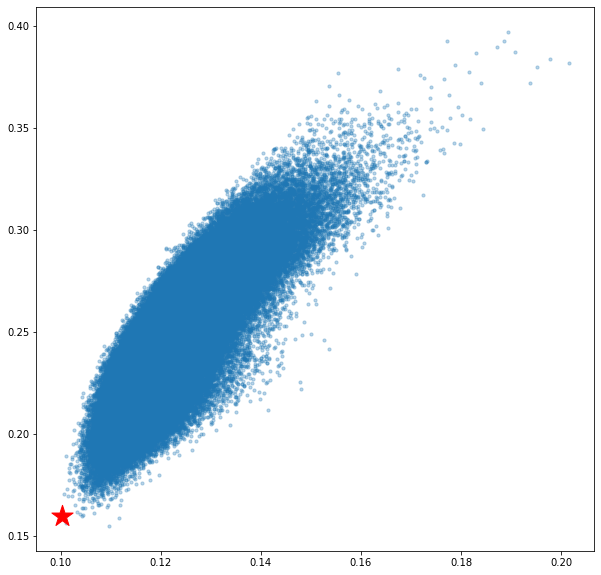

In [ ]:
# global minimum variance portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [ ]:
# tangency portfolio
rf = 0.0026 # risk free rate, from https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns       0.377000
Volatility    0.155338
VAW weight    0.005194
VCR weight    0.067851
VDC weight    0.008694
VDE weight    0.338665
VGT weight    0.022574
VHT weight    0.012932
VNQ weight    0.506080
VPU weight    0.038010
Name: 44482, dtype: float64

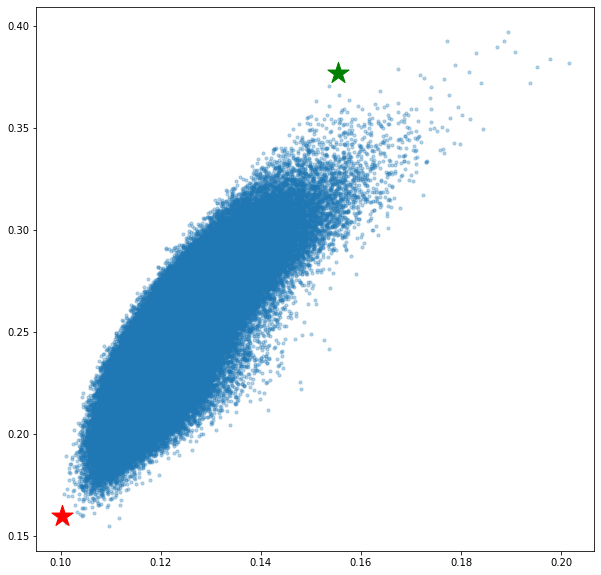

In [ ]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [ ]:
# Sharpe ratio
sharpe_ratio = (optimal_risky_port['Returns']-rf)/optimal_risky_port['Volatility']
sharpe_ratio

2.4102298740370895

In [ ]:
weights = [0.005323313, 0.037556476, 0.002283959, 0.291281377, 0.149472413, 0.089943302, 0.364340258, 0.059798901]
print(np.sum(weights))
returns = np.dot(weights, ind_er)
var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
sd = np.sqrt(var) # Daily standard deviation
ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
print(returns)
print(ann_sd)

0.999999999
0.34673326867663873
0.143244263754405


In [ ]:
current_sharpe_ratio = (optimal_risky_port['Returns']-rf)/optimal_risky_port['Volatility']